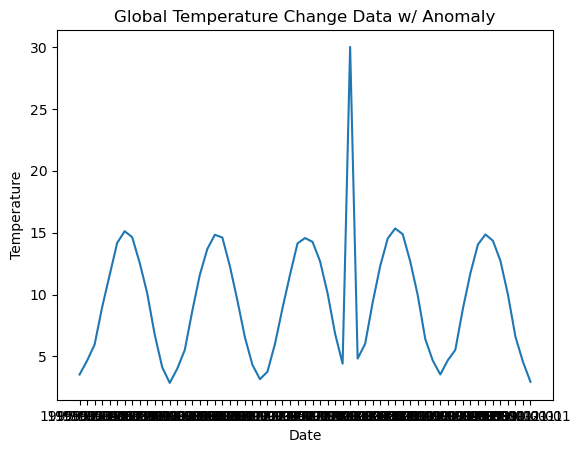

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

#3.2.2
# Load the CSV file into a DataFrame
df = pd.read_csv("GlobalTemperatures.csv")
series = pd.Series(df["LandAverageTemperature"].values, index = df['dt'])
series = series.bfill()

# Reduce number of data points to improve visibility of anomaly 
series = series['1995-01-01':'2000-01-01']

# Add anomaly
series.loc['1998-01-01'] = 30

plt.figure()
plt.plot(series)
plt.title('Global Temperature Change Data w/ Anomaly')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()



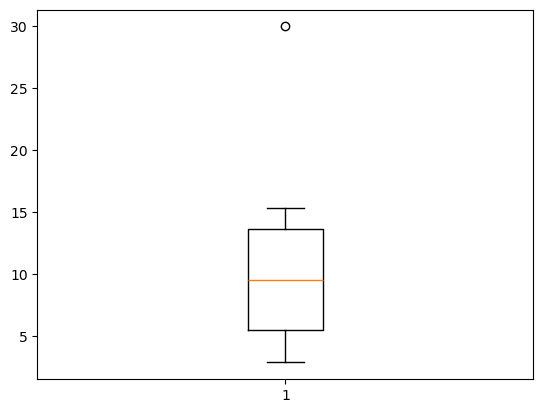

Outliers 
            dt     0
0  1998-01-01  30.0


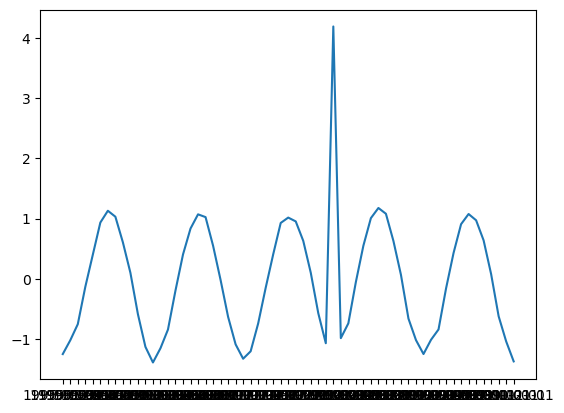

Series([], dtype: float64)


In [71]:
from pandas import Series

def box_plot_outlier(data):

    # Calculate quartiles and IQR
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    iqr = q3 - q1

    # Find outliers using IQR method
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers

def z_score(data):
    # Calculate Z-score for each data point
    return (data - np.mean(data)) / np.std(data)


#Box plot
plt.boxplot(series)
plt.show()

# Print Outliers
outliers = box_plot_outlier(series)
print("Outliers \n",series[series.isin(outliers)].reset_index())

# Plot zscores
zscore = z_score(series)
plt.plot(zscore)
plt.show()

# Anomalies
anomalies = zscore[zscore.abs() > 2]    # 98% Anomaly Threshold
print(anomalies)

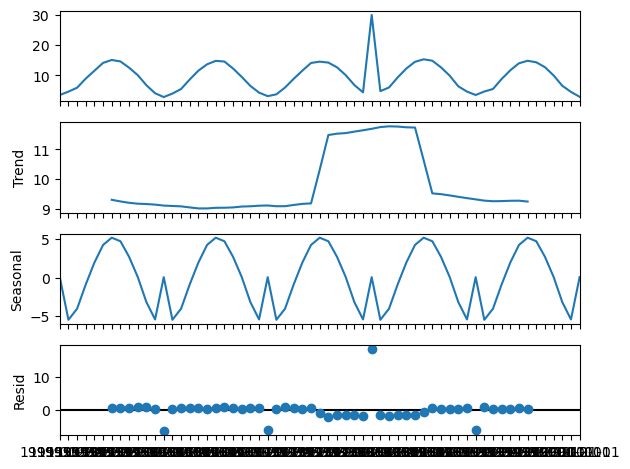

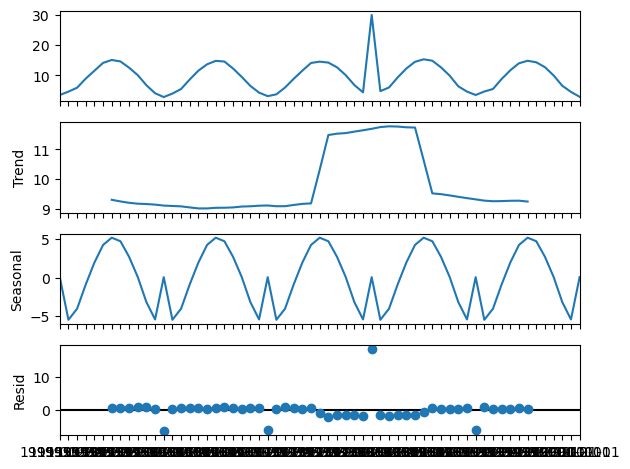

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose

seas_decomp = seasonal_decompose(series, model='additive', period=12)
seas_decomp.plot()
